In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import pandas as pd 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_start = dt.date(2017,1,1)
train_end = dt.date(2024,1,1)
test_start = dt.date(2024,1,2)
test_end = dt.datetime.today()

In [3]:
ticker = '^NSEI'

In [4]:
df_train = yf.download(ticker,train_start,train_end)
df_test = yf.download(ticker,test_start,test_end)
df = yf.download(ticker,train_start,test_end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
df_train.drop(columns = ['Open','High','Close','Low','Volume'],inplace = True)
df_test.drop(columns = ['Open','High','Close','Low','Volume'],inplace = True)

In [6]:
df.drop(columns = ['Open','High','Close','Low','Volume'],inplace = True)

In [7]:
df_train_l = df_train['Adj Close'].to_list()
df_test_l = df_test['Adj Close'].to_list()

In [8]:
df_l = df['Adj Close'].to_list()

In [9]:
from pmdarima import auto_arima

In [10]:
p_d_q = auto_arima(df_train, trace = True, supress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=21814.035, Time=1.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21822.208, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21823.598, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21823.613, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21826.003, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=21827.542, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=21827.508, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.48 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21825.597, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=21828.203, Time=0.51 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=21828.648, Time=0.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=21822.593, Time=0.78 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=21833.023, Time=0.07 sec

Best model:  ARIMA(2,1,2)(0,0,

In [11]:
df_train.tail()

,Adj Close
Date,
2023-12-22,21349.400391
2023-12-26,21441.349609
2023-12-27,21654.750000
2023-12-28,21778.699219
2023-12-29,21731.400391


In [12]:
df_test.head()

,Adj Close
Date,
2024-01-02,21665.800781
2024-01-03,21517.349609
2024-01-04,21658.599609
2024-01-05,21710.800781
2024-01-08,21513.000000


In [15]:
predictions = []
for i in range(len(df_test_l)):
    
    model = ARIMA(df_train_l, order=(2,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]

    predictions.append(yhat)
    
#     test_values = df_test_l[i]
#     df_train_l.append(test_values)

In [16]:
predictions

[22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879353724,
 22123.020879

In [69]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1782
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -11277.932
Date:                Wed, 27 Mar 2024   AIC                          22565.864
Time:                        19:34:56   BIC                          22593.288
Sample:                             0   HQIC                         22575.993
                               - 1782                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6003      0.013    -45.942      0.000      -0.626      -0.575
ar.L2         -0.9480      0.013    -75.229      0.000      -0.973      -0.923
ma.L1          0.6262      0.008     75.084      0.0

In [70]:
df_test['predictions'] = predictions

<Axes: xlabel='Date'>

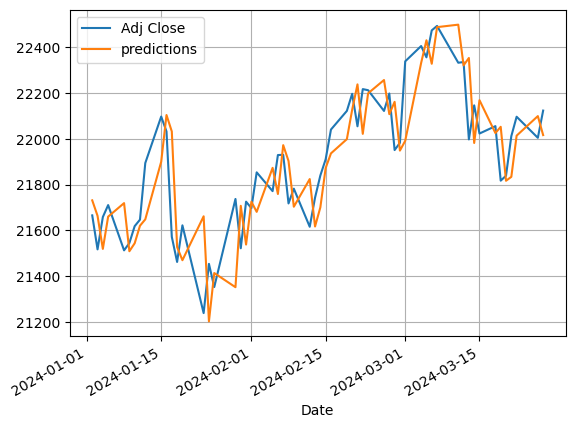

In [72]:
df_test[['Adj Close','predictions']].plot(grid = True)